In [339]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt

In [340]:
df=pd.read_csv("E:/Hadoop Softwares/Skillathon/Assigments/pandas dataset/house_rental_dataUC.csv", index_col=False)

In [341]:
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7.0,2,2,2,62000
1,2,2134.800,5,7.0,4,2,2,78000
2,3,1138.560,5,7.0,2,2,1,58000
3,4,1458.780,2,7.0,3,2,2,45000
4,5,967.776,11,14.0,3,2,2,45000


In [342]:
df.shape

(645, 8)

In [343]:
df.isna().sum()

Unnamed: 0     0
Sqft           0
Floor          0
TotalFloor     6
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 8 columns):
Unnamed: 0     645 non-null int64
Sqft           645 non-null float64
Floor          645 non-null int64
TotalFloor     639 non-null float64
Bedroom        645 non-null int64
Living.Room    645 non-null object
Bathroom       645 non-null int64
Price          645 non-null int64
dtypes: float64(2), int64(5), object(1)
memory usage: 40.4+ KB


In [345]:
df["TotalFloor"].fillna(df["TotalFloor"].mean(), inplace=True)

In [346]:
df.isna().sum()

Unnamed: 0     0
Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [347]:
df["Living.Room"].value_counts

<bound method IndexOpsMixin.value_counts of 0      2
1      2
2      2
3      2
4      2
      ..
640    2
641    1
642    1
643    2
644    2
Name: Living.Room, Length: 645, dtype: object>

In [348]:
df["Living.Room"].replace("zero", 0, inplace=True)

In [349]:
df["Living.Room"]=df["Living.Room"].astype(int)

In [350]:
df.columns

Index(['Unnamed: 0', 'Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room',
       'Bathroom', 'Price'],
      dtype='object')

In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 8 columns):
Unnamed: 0     645 non-null int64
Sqft           645 non-null float64
Floor          645 non-null int64
TotalFloor     645 non-null float64
Bedroom        645 non-null int64
Living.Room    645 non-null int32
Bathroom       645 non-null int64
Price          645 non-null int64
dtypes: float64(2), int32(1), int64(5)
memory usage: 37.9 KB


In [352]:
df.corr()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
Unnamed: 0,1.000000,-0.065182,-0.021299,-0.043522,-0.008638,-0.027035,-0.007877,-0.077512
Sqft,-0.065182,1.000000,0.143249,0.306428,0.615608,0.455940,0.728869,0.825514
Floor,-0.021299,0.143249,1.000000,0.563735,0.023986,-0.023563,0.099772,0.244553
TotalFloor,-0.043522,0.306428,0.563735,1.000000,0.066259,0.029761,0.146783,0.334538
Bedroom,-0.008638,0.615608,0.023986,0.066259,1.000000,0.526532,0.643083,0.467059
Living.Room,-0.027035,0.455940,-0.023563,0.029761,0.526532,1.000000,0.546826,0.328788
Bathroom,-0.007877,0.728869,0.099772,0.146783,0.643083,0.546826,1.000000,0.605542
Price,-0.077512,0.825514,0.244553,0.334538,0.467059,0.328788,0.605542,1.000000


In [353]:
import seaborn as sb

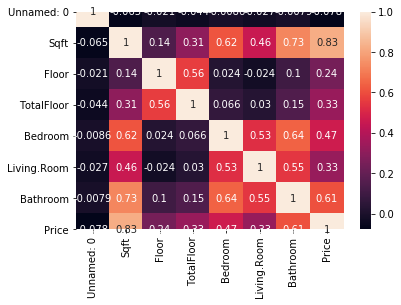

In [354]:
sb.heatmap(df.corr(), annot=True)

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

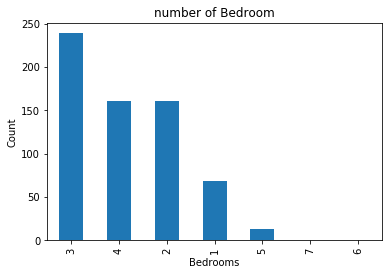

In [355]:
df['Bedroom'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sb.despine

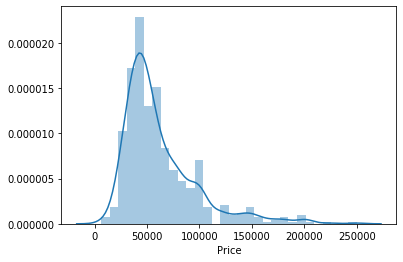

In [356]:
sb.distplot(df["Price"])

In [357]:
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7.0,2,2,2,62000
1,2,2134.800,5,7.0,4,2,2,78000
2,3,1138.560,5,7.0,2,2,1,58000
3,4,1458.780,2,7.0,3,2,2,45000
4,5,967.776,11,14.0,3,2,2,45000


In [358]:
X = df.drop(['Price','Unnamed: 0'], 1)
y = df['Price'].values.reshape(-1,1)

In [359]:
X.shape

(645, 6)

In [360]:
y.shape

(645, 1)

In [361]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X = poly_reg.fit_transform(X)

In [362]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [363]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [364]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(451, 28)
(451, 1)
(194, 28)
(194, 1)


In [376]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [377]:
y_pred= lin_reg.predict(X_test)   

In [378]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_pred)
print("Coefficient of Determination using Linear regression method = ",r_squared)

Coefficient of Determination using Linear regression method =  0.5860713428333572


In [379]:
from sklearn import metrics
metrics.mean_squared_error(y_test, y_pred)

472203233.86041874

In [369]:
R_SQUARE = r2_score(y_test, y_pred)
print(" Difference between actual data & fitted data: R-square: {}".format (R_SQUARE))

 Difference between actual data & fitted data: R-square: 0.5860713428333572


In [370]:
df_new = pd.DataFrame({'Actual value' : y_test.flatten(), 'Predicted_value' : y_pred.flatten()})

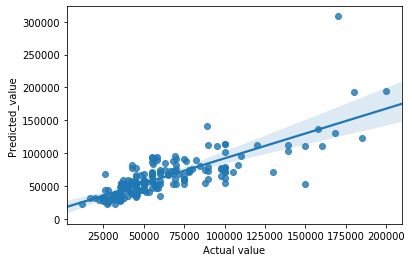

In [371]:
sb.regplot(x="Actual value", y="Predicted_value", data=df_new)

In [372]:
from sklearn.linear_model import SGDRegressor
regressor = SGDRegressor(max_iter=1000, tol=1e-4, alpha =0.01, random_state = 0, eta0 = 0.0001)
regressor.fit(X_train, y_train)

y_pred1 = regressor.predict(X_test)


C:\Users\LENOVO PC\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\LENOVO PC\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1211: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [373]:

from sklearn.metrics import r2_score
r_squared1 = r2_score(y_test, y_pred1)
print("Coefficient of Determination using sgd method= ",r_squared1)

Coefficient of Determination using sgd method=  0.6053181532681913


In [374]:
metrics.mean_squared_error(y_test, y_pred1)

450246778.39044094

In [375]:
R_SQUARE = r2_score(y_test, y_pred1)
print(" Difference between actual data & fitted data: R-square: {}".format (R_SQUARE))

 Difference between actual data & fitted data: R-square: 0.6053181532681913
